In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
#генератор
gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=(0.1, 0.99),  # Исправил местоположение значений
    rotation_range=30,      
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    dtype=np.float32)

In [10]:
#генерация данных
train = gen.flow_from_directory(
    '/Users/ilia/DataSetForDiplom/archive-6/Training',
    target_size=(150, 150),
    batch_size=32,  # Уменьшено значение размера пакета
    class_mode="binary",
    color_mode="rgb",
    shuffle=True,
    seed=123,
    subset="training")

Found 8453 images belonging to 2 classes.


In [20]:
model = tf.keras.models.load_model('/Users/ilia/brainTumorClassification/my_model.keras')
model2 = tf.keras.models.load_model('/Users/ilia/brainTumorClassification/my_model2.keras')

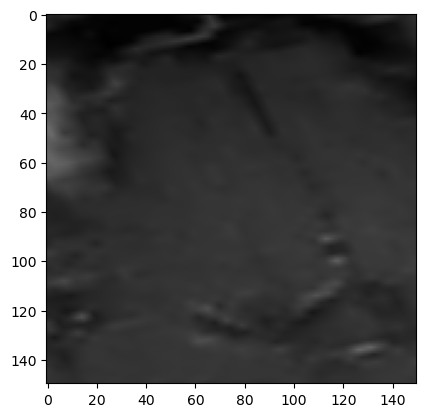

In [24]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][9])

In [25]:
predictions = []
predictions2 = []

for batch_data in train:
    preds = model.predict(batch_data)  # Предсказание для текущего пакета
    predictions.append(preds)
    
    if len(predictions) * train.batch_size >= train.samples:  # Проверка, достигли ли мы конца
        break

# Объединяем все предсказания в один массив
predictions = np.concatenate(predictions, axis=0)


for batch_data in train:
    preds2 = model2.predict(batch_data)
    predictions2.append(preds2)

    if len(predictions2) * train.batch_size >= train.samples:  # Проверка, достигли ли мы конца
        break

predictions2 = np.concatenate(predictions2, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 

In [22]:
folder_anomaly_path = '/Users/ilia/DataSetForDiplom/archive-6/Training/Anomaly'

i=0

for results in range(len(predictions)):
    print('predictions[i]', predictions[i])
    print( 'predictions[i]2', predictions2[i])


predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47977313]
predictions[i] [0.7854324]
predictions[i]2 [0.47

In [ ]:
# folder1 = '/Users/ilia/DataSetForDiplom/archive-6/Brain Tumor'
# folder2 = '/Users/ilia/DataSetForDiplom/archive-6/Healthy'

# # Cписки путей
# file_paths1 = []
# file_paths2 = []

# for filename in os.listdir(folder1):
#     if filename.endswith('.jpg') or filename.endswith('.png'):
#         file_paths1.append(os.path.join(folder1, filename))

# for filename in os.listdir(folder2):
#     if filename.endswith('.jpg') or filename.endswith('.png'):
#         file_paths2.append(os.path.join(folder2, filename))

# file_paths = file_paths1 + file_paths2

# # Проверим количество найденных изображений
# print(f"Найдено {len(file_paths)} изображений.")